# Problem 3
NIM/Nama : 19623034/Refki Alfarizi\
Tanggal  : 16 November 2023\
Deskripsi: Diberikan data harga rumah yang disewakan di Airbnb di Singapura. Gambarkan:
1. Histogram distribusi banyaknya review di aplikasi yang memiliki jenis penyediaan ruang Private room
dengan bins 30.
2. Pie chart perbandingan banyaknya masing-masing jenis penyediaan ruang dengan banyaknya review di
aplikasi di atas 100.
3. Scatter plot dengan long sebagai x dan lat sebagai y dari rumah yang tidak dimiliki oleh Jay.
4. Bubble plot dengan long sebagai x, lat sebagai y, dan banyaknya hari ketersediaan rumah dalam satu
tahun sebagai ukuran dari rumah yang berada di neighbourhood Novena.
5. Stacked bar chart dari rumah yang disewakan oleh ’JoJo’, ’Elizabeth’, dan ’Jimmy’, dengan room type
sebagai x dan nama pemilik rumah sebagai stacked y.

## Inisiasi Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("P05-03.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


## 1. Histogram distribusi banyaknya review di aplikasi yang memiliki jenis penyediaan ruang Private room dengan bins 30

<Axes: title={'center': 'Distribusi Banyaknya Review Jenis Ruang Private Room'}, ylabel='Frequency'>

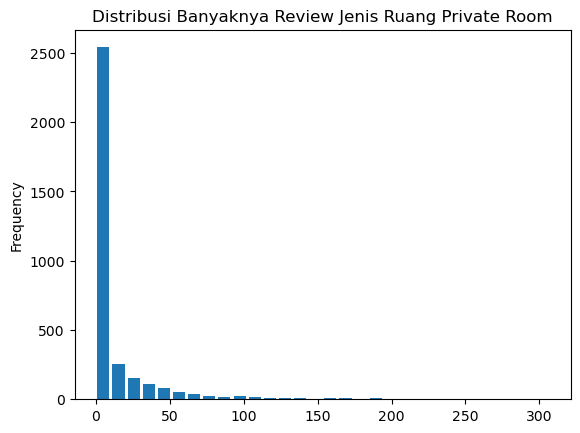

In [34]:
df[df['room_type'] == 'Private room']['number_of_reviews'].plot(
    kind="hist", bins=30, rwidth=0.8, title="Distribusi Banyaknya Review Jenis Ruang Private Room")

## 2. Pie chart perbandingan banyaknya masing-masing jenis penyediaan ruang dengan banyaknya review di aplikasi di atas 100

<Axes: ylabel='room_type'>

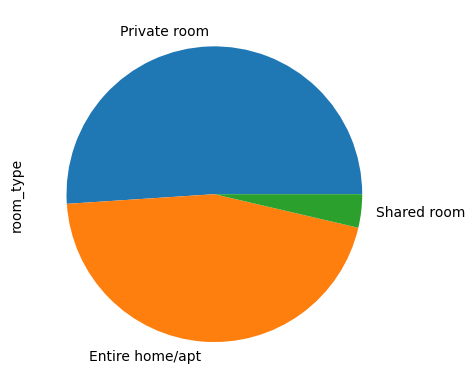

In [10]:
df[df['number_of_reviews'] > 100]['room_type'].value_counts().plot(kind='pie')

## 3. Scatter plot dengan long sebagai x dan lat sebagai y dari rumah yang tidak dimiliki oleh Jay

<Axes: xlabel='longitude', ylabel='latitude'>

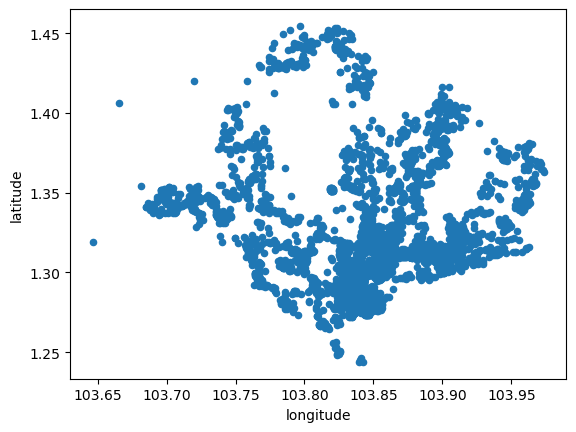

In [14]:
df[df['host_name'] != "Jay"].plot(kind="scatter", x="longitude", y="latitude")

## 4. Bubble plot dengan long sebagai x, lat sebagai y, dan banyaknya hari ketersediaan rumah dalam satu tahun sebagai ukuran dari rumah yang berada di neighbourhood Novena

<Axes: xlabel='longitude', ylabel='latitude'>

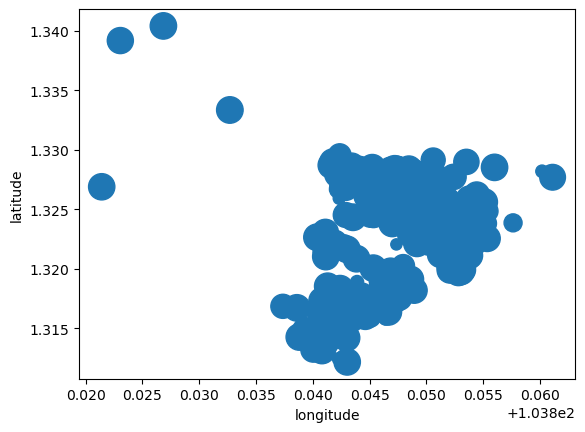

In [17]:
df[df['neighbourhood'] == 'Novena'].plot(kind="scatter", x='longitude', y="latitude", sizes=df['availability_365'])

## 5. Stacked bar chart dari rumah yang disewakan oleh 'JoJo', 'Elizabeth', dan 'Jimmy', dengan room type sebagai x dan nama pemilik rumah sebagai stacked y

<Axes: xlabel='room_type'>

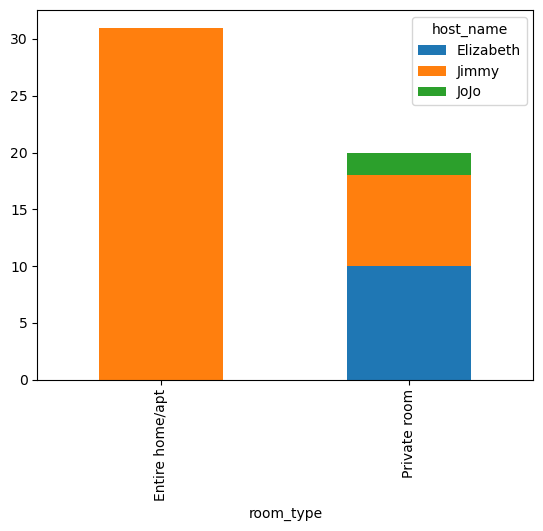

In [32]:
df[(df['host_name'] == 'JoJo')
   | (df['host_name'] == 'Elizabeth')
   | (df['host_name'] == 'Jimmy')
  ].groupby(['room_type', 'host_name']).size().unstack().plot(kind="bar", stacked=True)